<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  fl

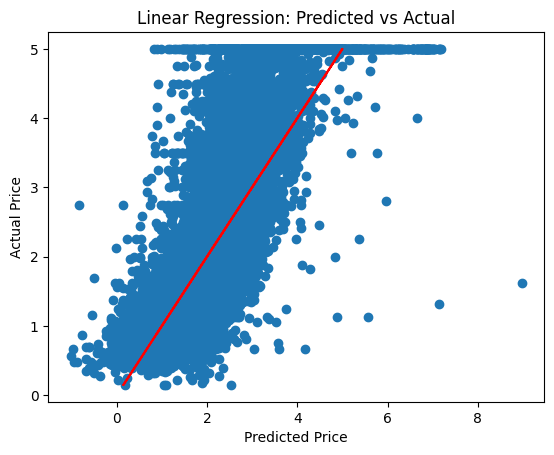

R^2 score: 0.606232685199805


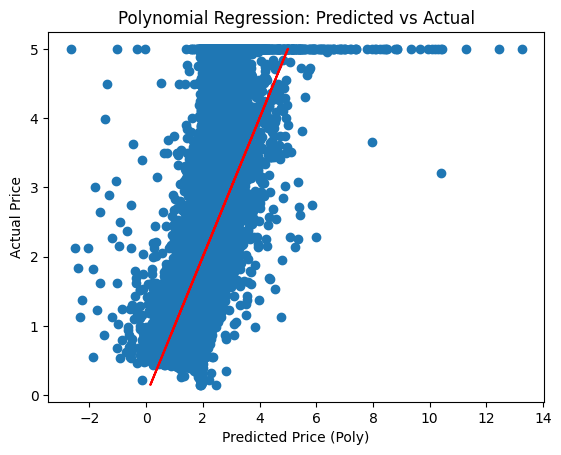

R^2 score (poly): 0.36629180948308626


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

california = fetch_california_housing()

print(type(california))
print(california.keys())
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)

# Объединение в DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Price'] = california.target
print(data.head())

data.info()

print(data.describe().round(2))

y = data['Price']
X = data.drop('Price', axis=1)
print(y.shape, X.shape)

# Обучение линейной регрессии
model = LinearRegression()
model.fit(X, y)

print("Coefficients: \n", model.coef_)
for k, v in zip(X.columns, model.coef_):
    print(k, v)
print("Intercept: \n", model.intercept_)


y_pred = model.predict(X)
print(y_pred[:5])
print(y[:5])


plt.scatter(y_pred, y)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression: Predicted vs Actual')
plt.show()


print("R^2 score:", model.score(X, y))

# Полиномиальная регрессия (5 степень)
poly = PolynomialFeatures(5).fit_transform(X)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')
plt.xlabel('Predicted Price (Poly)')
plt.ylabel('Actual Price')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.show()

print("R^2 score (poly):", polynomial.score(poly, y))

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print('MSE:', mse)
print('MAE:', mae)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print("MAPE (%):", mape)

r2 = r2_score(y, y_pred)
print("R2:", r2)
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2:", adj_r2)

model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X, y)
y_pred_no_intercept = model_no_intercept.predict(X)
print('R^2 без интерсепта:', model_no_intercept.score(X, y))
print('MSE без интерсепта:', mean_squared_error(y, y_pred_no_intercept))
print('MAE без интерсепта:', mean_absolute_error(y, y_pred_no_intercept))

MSE: 0.5243209861846072
MAE: 0.5311643817546464
MAPE (%): 31.71540459723321
R2: 0.606232685199805
Adjusted R2: 0.606079995629818
R^2 без интерсепта: 0.5462360656980104
MSE без интерсепта: 0.6042095028861159
MAE без интерсепта: 0.5727102707655313


## Сравнение различных моделей регрессии

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_plot(model, X, y, name=None):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    r2 = r2_score(y, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    plt.scatter(y_pred, y, alpha=0.3)
    plt.plot(y, y, c='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    title = name if name else type(model).__name__
    plt.title(title)
    plt.show()

    print(f"{title}: R2={r2:.3f}, MSE={mse:.3f}, MAE={mae:.3f}, MAPE={mape:.2f}%, Adj_R2={adj_r2:.3f}")
    return {'MSE': mse, 'MAE': mae, 'MAPE': mape, 'R2': r2, 'Adj_R2': adj_r2}


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


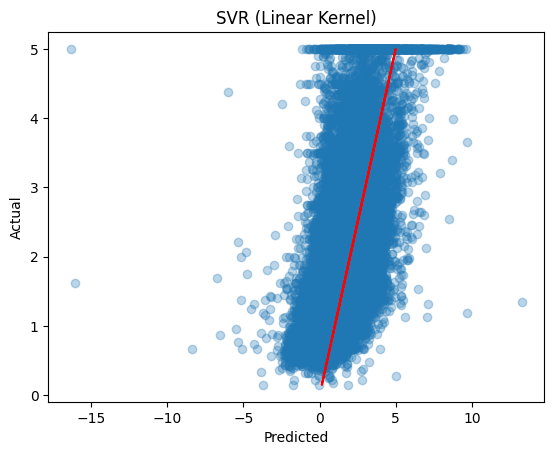

SVR (Linear Kernel): R2=-0.430, MSE=1.904, MAE=1.059, MAPE=65.33%, Adj_R2=-0.431


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


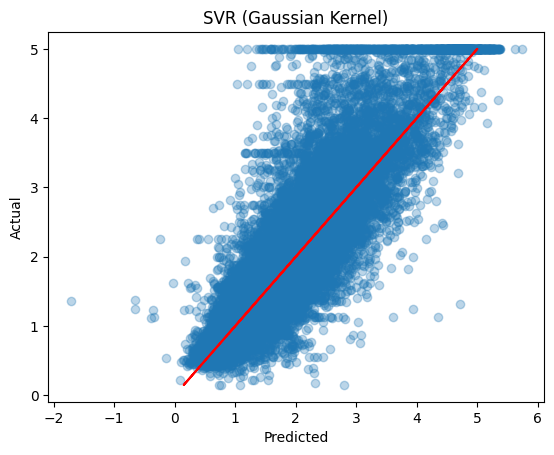

SVR (Gaussian Kernel): R2=0.732, MSE=0.357, MAE=0.408, MAPE=22.06%, Adj_R2=0.732


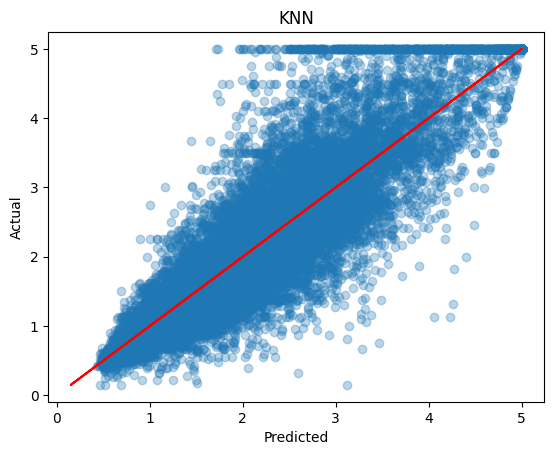

KNN: R2=0.799, MSE=0.268, MAE=0.350, MAPE=18.94%, Adj_R2=0.798


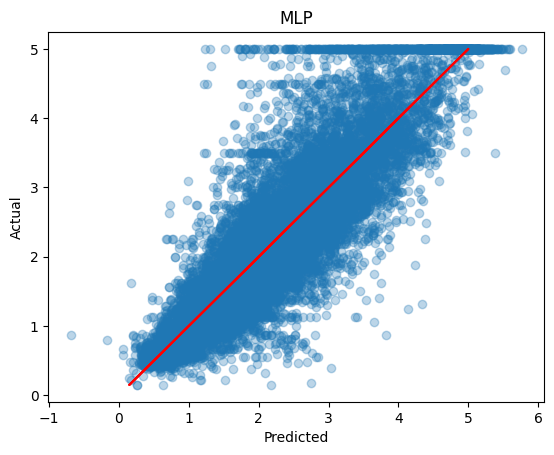

MLP: R2=0.802, MSE=0.264, MAE=0.353, MAPE=19.95%, Adj_R2=0.802


In [23]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = {}
results['SVR (linear)'] = evaluate_and_plot(SVR(kernel='linear', max_iter=4000), X_scaled, y, 'SVR (Linear Kernel)')
results['SVR (rbf)'] = evaluate_and_plot(SVR(kernel='rbf', max_iter=4000), X_scaled, y, 'SVR (Gaussian Kernel)')
results['KNN'] = evaluate_and_plot(KNeighborsRegressor(), X_scaled, y, 'KNN')
results['MLP'] = evaluate_and_plot(MLPRegressor(max_iter=700, random_state=42), X_scaled, y, 'MLP')


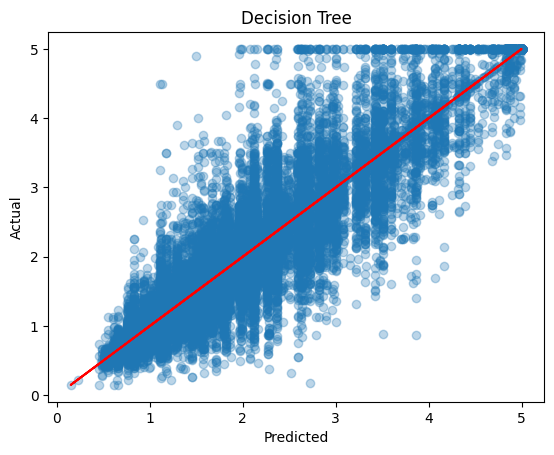

Decision Tree: R2=0.821, MSE=0.239, MAE=0.334, MAPE=19.47%, Adj_R2=0.821


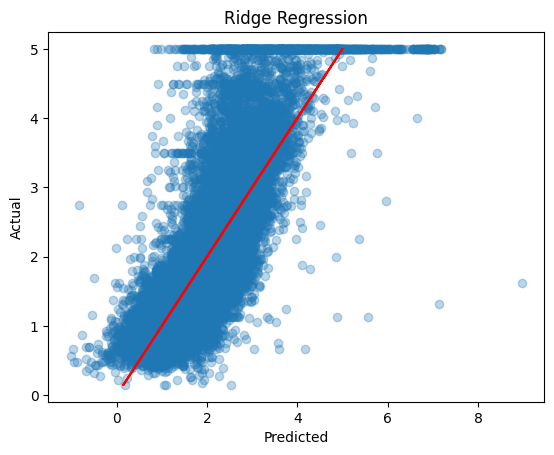

Ridge Regression: R2=0.606, MSE=0.524, MAE=0.531, MAPE=31.71%, Adj_R2=0.606


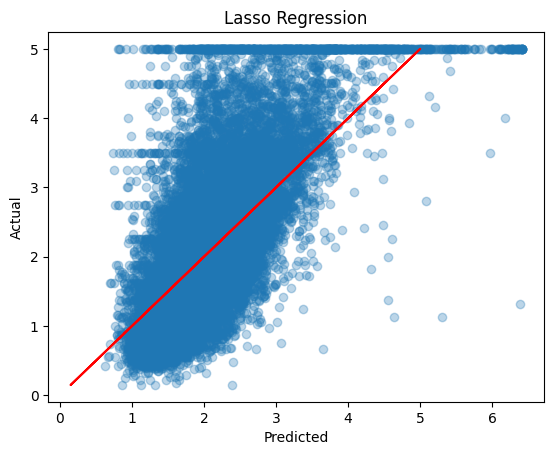

Lasso Regression: R2=0.494, MSE=0.674, MAE=0.620, MAPE=39.55%, Adj_R2=0.494


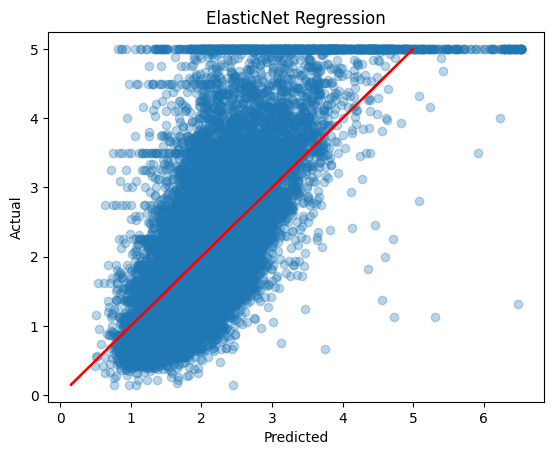

ElasticNet Regression: R2=0.527, MSE=0.630, MAE=0.595, MAPE=37.28%, Adj_R2=0.527


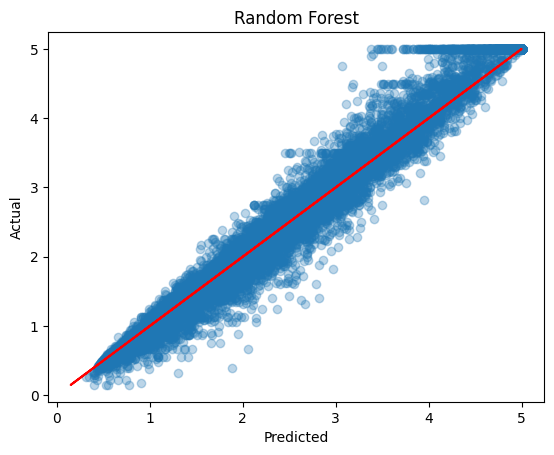

Random Forest: R2=0.971, MSE=0.038, MAE=0.124, MAPE=6.90%, Adj_R2=0.971


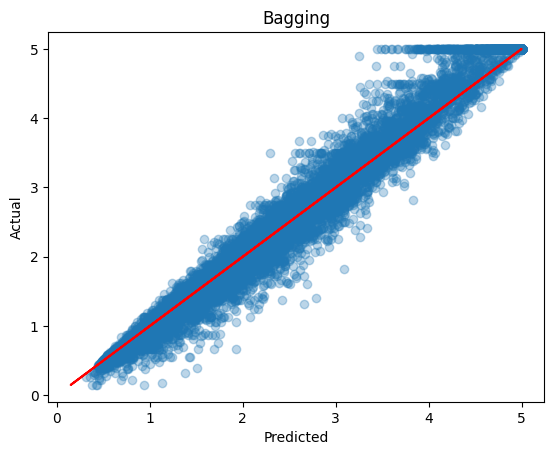

Bagging: R2=0.973, MSE=0.036, MAE=0.122, MAPE=6.79%, Adj_R2=0.973


In [24]:
results['Decision Tree'] = evaluate_and_plot(DecisionTreeRegressor(max_depth=10), X_scaled, y, 'Decision Tree')
results['Ridge'] = evaluate_and_plot(Ridge(alpha=1.0), X_scaled, y, 'Ridge Regression')
results['Lasso'] = evaluate_and_plot(Lasso(alpha=0.1), X_scaled, y, 'Lasso Regression')
results['ElasticNet'] = evaluate_and_plot(ElasticNet(alpha=0.1, l1_ratio=0.5), X_scaled, y, 'ElasticNet Regression')
results['Random Forest'] = evaluate_and_plot(RandomForestRegressor(n_estimators=30, random_state=42), X_scaled, y, 'Random Forest')
results['Bagging'] = evaluate_and_plot(BaggingRegressor(n_estimators=50, random_state=42), X_scaled, y, 'Bagging')

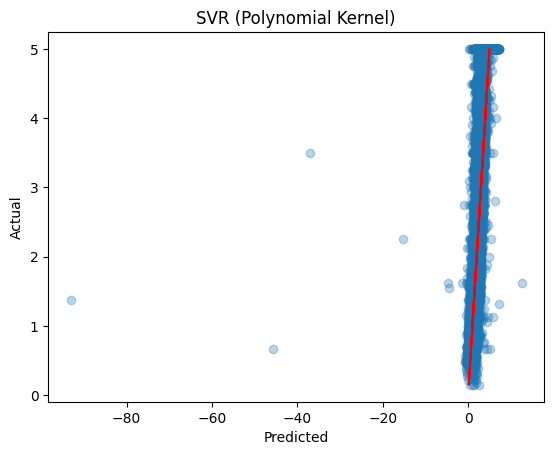

SVR (Polynomial Kernel): R2=0.130, MSE=1.159, MAE=0.511, MAPE=28.32%, Adj_R2=0.129


In [40]:
results['SVR (poly)'] = evaluate_and_plot(SVR(kernel='poly', degree=1, coef0=3, max_iter=100000), X_scaled, y, 'SVR (Polynomial Kernel)')